# Resolución de la PEC4

Para la implementación del ejercicio he decidido separar los módulos por
cada uno de los puntos. Además otro módulo consiste en la extracción
de los datos cuyos archivos he incluido en una carpeta denominada "data".

He creído conveniente incluir un "notebook" para visualizar el resultado en
el mismo github.

1. He implementado una función que cuenta el número de veces que aparece:
   - El término *Huffington Post*
   - Una url (sea http o https) con formato pdf.

In [1]:
%run -i "regex.py"

The pattern Huffington_Post appears 112 times
The pattern url_pdf appears 1366 times


<br>1.2 ¿Si tuviéramos un archivo de 1Gb lo harías igual? Si no es así, implementar la solución para este caso.
  No, en el caso de que el archivo fuera muy extenso sería mejor un contador que contara
  las líneas en las que coincida mi regex:
  count = sum(1 for line in f if re.search(regex, line))
  En mi caso la implementación sería:
  count1 = sum(1 for line in f if re.search('Huffington Post', line))
  count2 = sum(1 for line in f if re.search('^http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])|.pdf', line))
  print("The pattern Huffington_Post appears {} times".format(count1))
  print("The pattern url_pdf appears {} times".format(count2))

  <br>1.3 ¿Si tuviéramos 100 archivos de 1Gb cómo lo harías? No hace falta implementar la solución, sólo una pequeña descripción de cómo resolverías el problema.
   Si tuviéramos 100 archivos sería mejor implementar un programa para poder realizar
   multitarea "multithreading" de manera que se puedan ejecutar tareas como acceder al archivo
   y al mismo tiempo buscar los patrones.

In [2]:
%run -i "fichero.py"


The pattern Huffington_Post appears 112 times

The pattern pattern url_pdf appears 1358 times


2. Extraigo los datos necesarios en dos tablas approval_polls y concern_polls con el siguiente criterio:
     - Sólo entrevistas en las cuales su agente entrevistador (*pollster*) esté en la tabla `pollster_ratings.xlsx`
     - Sólo entrevistas sin *tracking*.
     - Sólo entrevistas en las cuales su agente entrevistador no ha estado vetado (*banned*).


In [3]:
%run -i "data_extr.py"

3. Sobre los datos extraídos en el ejercicio 2 de la tabla `approval_polls`, calculad y representad gráficamente:<br>
    <br> 3.1 El número de personas que aprueban (*approve*) y el número de personas que desaprueban (*disapprove*), para las preguntas que contienen las palabras *Trump* y *coronavirus* en el texto. Representaremos estos datos por cada partido (*party*) (*D* (demócratas), *R* (republicanos), *I* (independientes), *all* (personas sin clasificar por partido)).<br>


        approve  disapprove
party                      
D       2439.83    17235.55
I       6795.80     9997.20
R      17157.65     2874.93
all     9819.40    12265.93

 2439 people of the Democrat party approve Trump's Covid policy


 6795 people of the Independent party approve Trump's Covid policy


 17157 people of the Republican party approve Trump's Covid policy


 9819 people of all parties that approve Trump's Covid policy


 17235 people of the Democrat party disapprove Trump's Covid policy


 9997 people of the Independent party disapprove Trump's Covid policy


 2874 people of the Republican party disapprove Trump's Covid policy


 12265 people of all  parties that disapprove Trump's Covid policy



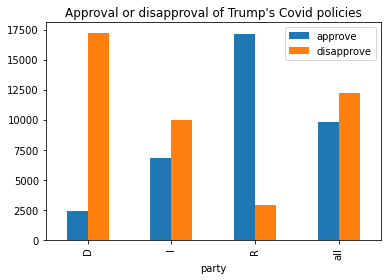

In [4]:
%run -i "approve_disapp.py"

4. En base a la información previa y los datos transformados sobre notas clasificatoria voy a extraer`
    <br> 4.1 Cuánta gente ha participado en las entrevistas. Representar el resultado por pantalla debidamente formatado.
    <br> 4.2 Cuánta gente en la materia (*subject*) de la entrevista relacionada con la economia (*economy*) está *very* (*concern*, preocupación) y cuánta está *not_at_all* (*concern*, preocupación).
    <br> 4.3 Cuál es el porcentaje de gente en la matèria (*subject*) de la entrevista relacionada con la infección (*infected*) está *very* (*concern*, preocupación) y cuánta está *not_at_all* (*concern*, preocupación).
    <br> 4.4 Cuántas entrevistas hay por cada nota clasificatoria (*grade*).

`*` La nota clasificatoria será reducida a sólo los valores *A, B, C, D, F* teniendo en cuenta que en caso de tener una valoración entre dos categorías nos quedaremos con la inferior. *Ejemplo B/C &#8594; C, B- &#8594; B, B+ &#8594; B*.


The total sample size of the population interviewed in polls is 1271783 people 



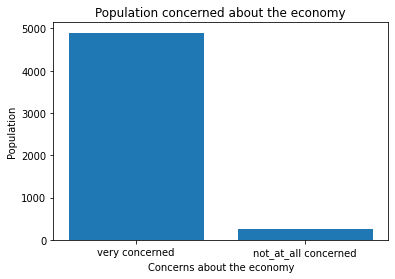


The number of the population very concerned about the economy is 4898.0 


The number of the population not_at_all concerned about the economy is 265.0 



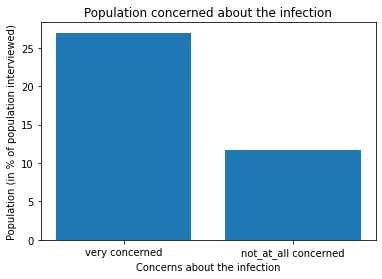


The percentage  of  population very concerned about the infection is 26.97 


The percentage of  population not_at_all concerned about the infection is 11.71 


The number of polls with A grade is 14 


The number of polls with B grade is 66 


The number of polls with C grade is 312 


The number of polls with D grade is 51 



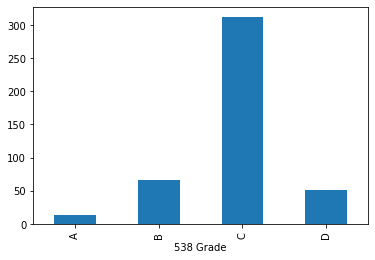

In [8]:
%run -i "concern.py"
%run -i "pollnumber.py"

5. A partir de los datos del ejercicio 4, he creado una nueva variable que será la puntuación (credibilidad) que le daremos a ese agente entrevistador. Esta puntuación vendrá dada por:
     puntuación = nota evaluada + *Predictive    Plus-Minus*
     Donde la nota evaluada se refiere a que la clasificación por *A, B, C, D, F* se evaluará de la siguiente forma:
    A &#8594; 1, B &#8594; 0.5, C &#8594; 0, D &#8594; -0.5, F &#8594; -1

   <br> 5.1 Calcular (y representar gráficamente) para aquellas entrevistas que su puntuación sea superior o igual a 1.5:

    a) El número de personas según el nivel de preocupación (*concern very, somewhat,...*) en función si la entrevista había finalizado estricatament antes del 2020-09-01 (1 de septiembre de 2020), o después.

    b) El porcentaje de personas según el nivel de preocupación (*concern very, somewhat,...*) en función si la entrevista había finalizado estricatament antes del 2020-09-01, o después. (**Nota:** porcentaje respecto el número de personas por cada grupo antes del 2020-09-01 y después).


<Figure size 3600x3600 with 0 Axes>

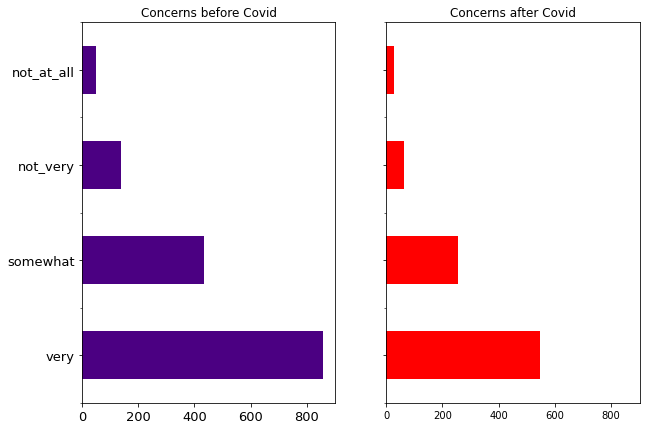


The number of people not at all concerned before Covid is 859 


The number of people not very concerned before Covid is 436 


The number of people somewhat concerned before Covid is 138 


The number of people very concerned before Covid is 50 


The number of people not at all concerned after Covid is 548 


The number of people not very concerned after Covid is 257 


The number of people somewhat concerned after Covid is 63 


The number of people very concerned after Covid is 26 



<Figure size 3600x3600 with 0 Axes>

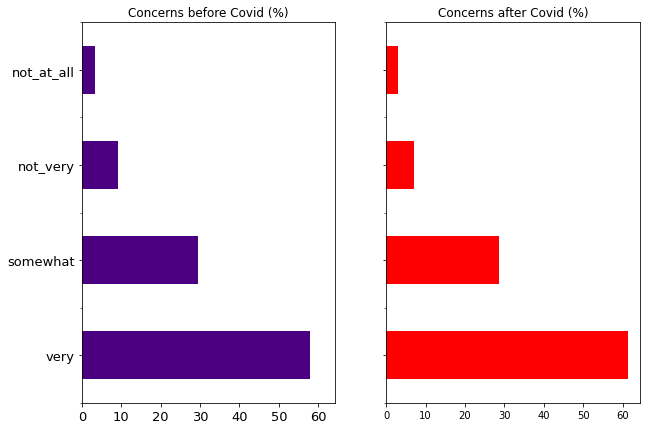

In [9]:
%run -i "graph_pre_and_post.py"

<br> 5.2 ¿Qué podéis decir de las dos gráficas obtenidas en el ejercicio anterior (5.1)? ¿Qué conclusiones podéis extraer?
No se observa que la pandemia haya modificado notablemente las preocupaciones de la población. En el gráfico de los porcentajes
sí se observa un incremento aunque no superior al 5% de la población que está muy preocupada
también se aprecia una reducción de la población que no está muy preocupada.